### Importing the Neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset (via Pandas)

In [3]:
df1 = pd.read_csv(r"C:\Users\Administrator\OneDrive\Telecom Churn Dataset\churn_data.csv")

In [4]:
df2 = pd.read_csv(r"C:\Users\Administrator\OneDrive\Telecom Churn Dataset\customer_data.csv")

In [5]:
df3 = pd.read_csv(r"C:\Users\Administrator\OneDrive\Telecom Churn Dataset\internet_data.csv")

In [6]:
# to show first 5 rows of the dataset
df1.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# to show first 5 rows of the dataset
df2.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
# to show first 5 rows of the dataset
df3.head(5)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [9]:
df1.shape

(7043, 9)

In [10]:
df2.shape

(7043, 5)

In [11]:
df3.shape

(7043, 9)

**now we need to concat all 3 dataset into one dataset**

In [12]:
df2.drop('customerID',axis=1,inplace=True) # drop because df1 has already 'customerID' 

In [13]:
df3.drop('customerID',axis=1,inplace=True) # drop because df1 has already 'customerID' 

In [14]:
df4 = pd.concat([df1,df2,df3],axis=1) # combine df1, df2, df3 and store this into df4

In [15]:
df4.head(5)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [16]:
df4.shape

(7043, 21)

In [17]:
df4.info() # to check datatypes of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [18]:
# check which column have object values
df4.select_dtypes(include="object").columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn', 'gender', 'Partner',
       'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [19]:
# check length of all object columns
len(df4.select_dtypes(include="object").columns)

18

### Data Preparation ( Cleaning, handling missing values, outliers, Encoding,value_counts, change in format etc.)

In [20]:
# to check null values
df4.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [21]:
# to check null values in terms of percentage
df4.isnull().sum()/len(df4)*100

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

### Visualization

In [22]:
df4['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

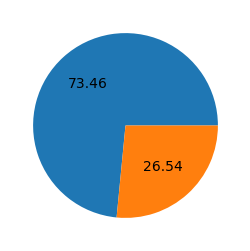

In [23]:
#class imbalance

plt.figure(figsize=(3,3))
plt.pie(df4['Churn'].value_counts(),autopct='%.2f')
plt.show()

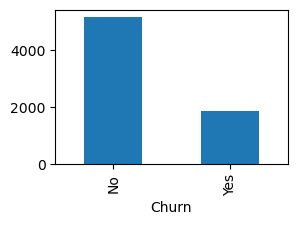

In [24]:
#barplot

plt.figure(figsize=(3,2))
value_counts = ['No','Yes']
df4['Churn'].value_counts().plot.bar()
plt.show()

In [25]:
df4['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

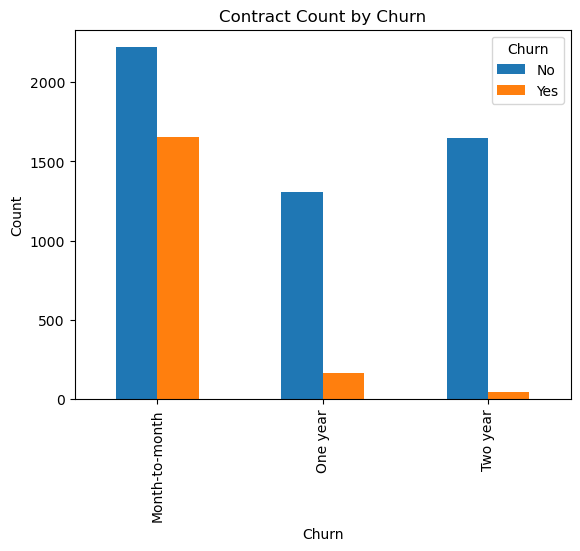

In [26]:
# Group by 'Churn' and 'Contract', then get the size of each group

df4.groupby(['Contract', 'Churn']).size().unstack().plot(kind='bar')

# Adding labels and title for clarity
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Contract Count by Churn')
plt.show()

In [27]:
df4['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

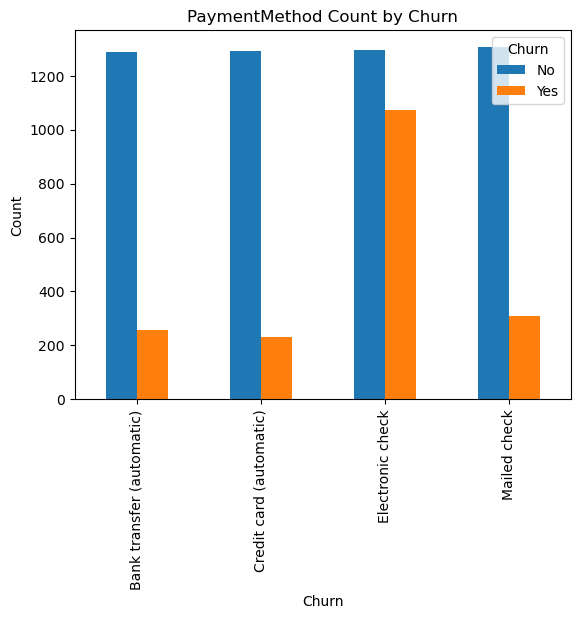

In [28]:
# Group by 'Churn' and 'PaymentMethod', then get the size of each group

df4.groupby(['PaymentMethod', 'Churn']).size().unstack().plot(kind='bar')

# Adding labels and title for clarity
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('PaymentMethod Count by Churn')
plt.show()

In [29]:
df4['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

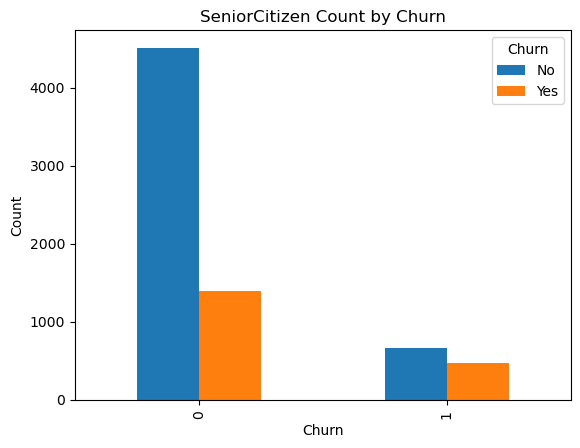

In [30]:
# Group by 'Churn' and 'SeniorCitizen', then get the size of each group

df4.groupby(['SeniorCitizen', 'Churn']).size().unstack().plot(kind='bar')

# Adding labels and title for clarity
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('SeniorCitizen Count by Churn')
plt.show()

In [31]:
df4['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

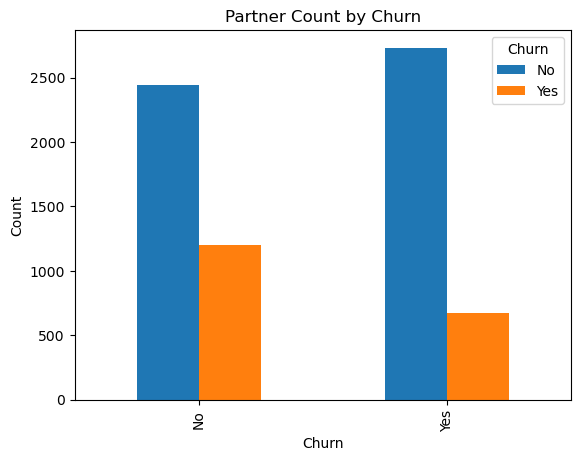

In [32]:
# Group by 'Churn' and 'Partner', then get the size of each group

df4.groupby(['Partner', 'Churn']).size().unstack().plot(kind='bar')

# Adding labels and title for clarity
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Partner Count by Churn')
plt.show()

In [33]:
df4['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

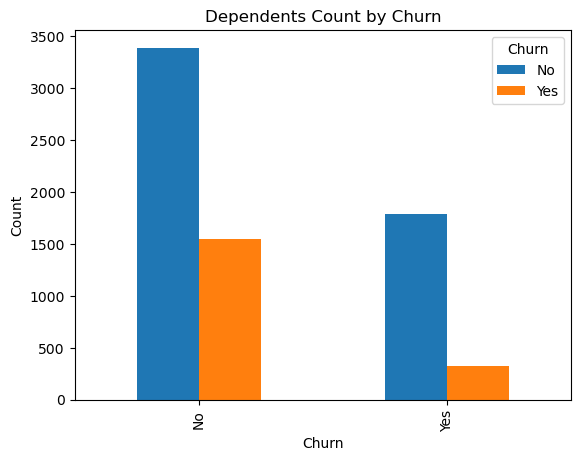

In [34]:
# Group by 'Churn' and 'Dependents', then get the size of each group

df4.groupby(['Dependents', 'Churn']).size().unstack().plot(kind='bar')

# Adding labels and title for clarity
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Dependents Count by Churn')
plt.show()

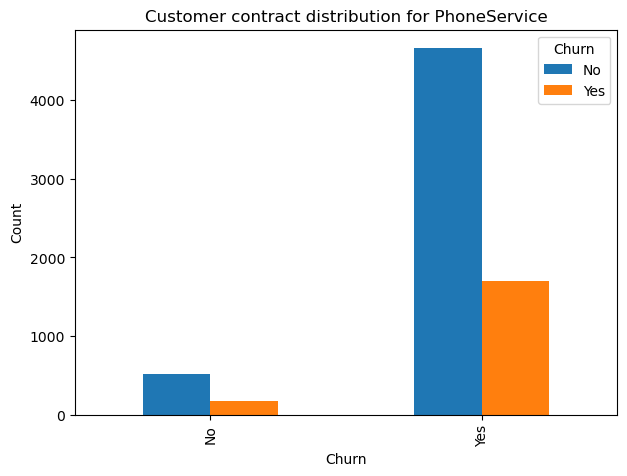

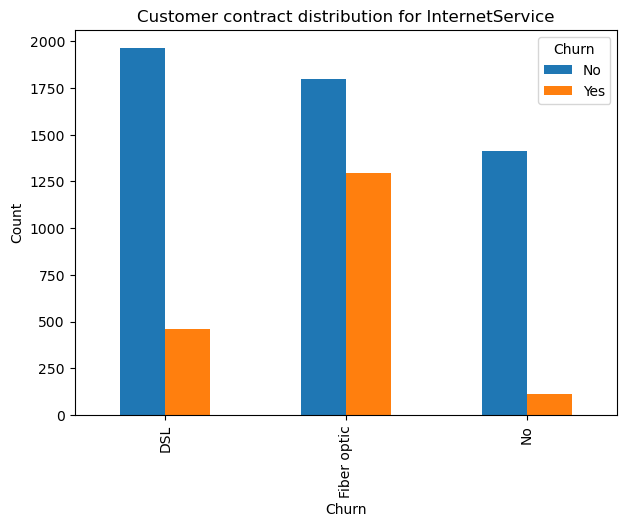

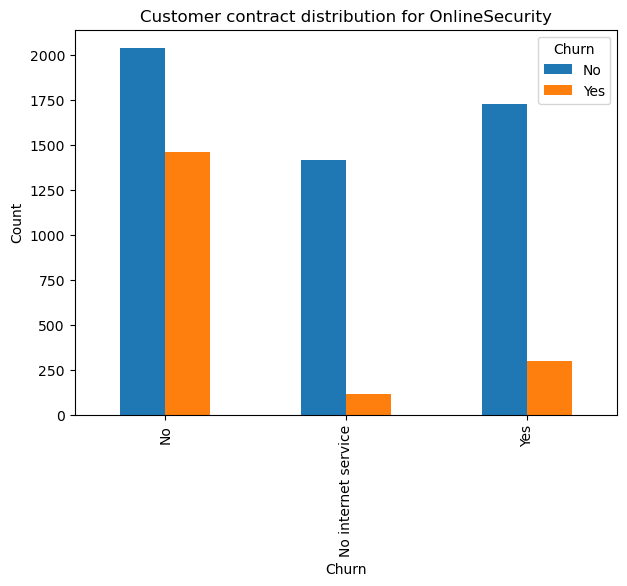

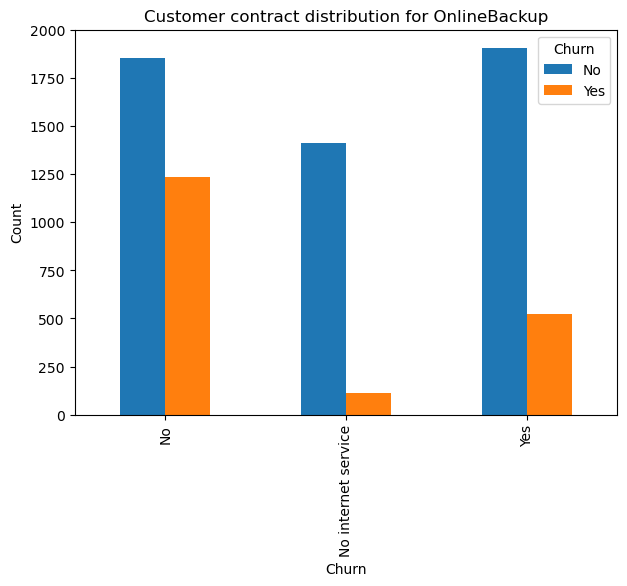

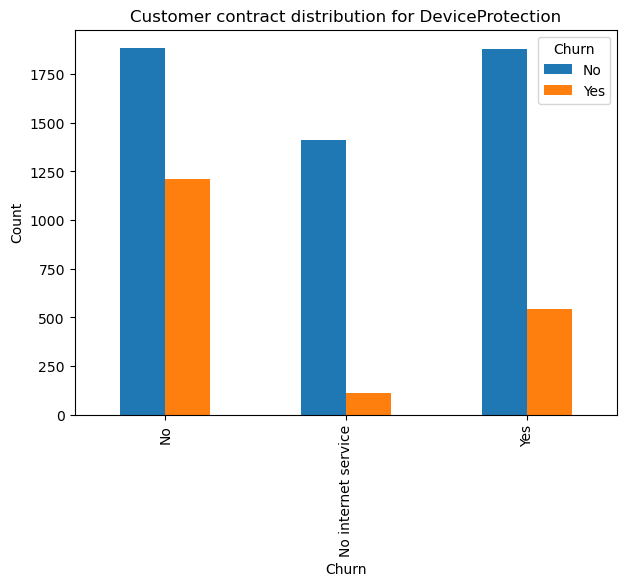

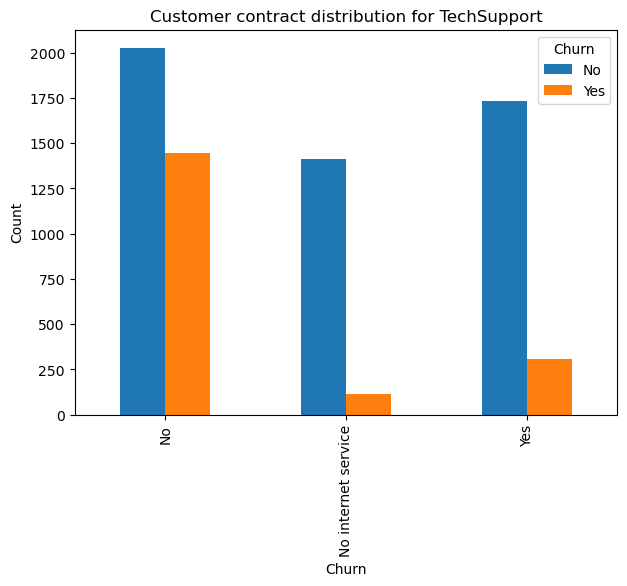

In [35]:
# List of values to replace 'Contract' in each plot
contract_values = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport']  # Replace with your values

# Create a subplot for each contract value
for contract_value in contract_values:
    fig, ax = plt.subplots(figsize=(7, 5))

    # Group data by Churn for the current contract value
    grouped_data = df4.groupby([contract_value, 'Churn']).size().unstack()

    # Plot the histogram
    grouped_data.plot(kind='bar', stacked=False, ax=ax)
    ax.set_xlabel('Churn')
    ax.set_ylabel('Count')
    ax.set_title(f'Customer contract distribution for {contract_value}')
    ax.legend(title='Churn')

plt.show()  # Show all the plots

### Encoding

`converting all object columns into numerical columns`

In [36]:
# As we know datatypes for all column should be a number for creating a AI Model
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [37]:
# to know all (object and numerical both) distinct value counts of each columns
for i,cols in enumerate(df4.columns, start=1):
    print(i,cols, ":", df4[cols].nunique())

1 customerID : 7043
2 tenure : 73
3 PhoneService : 2
4 Contract : 3
5 PaperlessBilling : 2
6 PaymentMethod : 4
7 MonthlyCharges : 1585
8 TotalCharges : 6531
9 Churn : 2
10 gender : 2
11 SeniorCitizen : 2
12 Partner : 2
13 Dependents : 2
14 MultipleLines : 3
15 InternetService : 3
16 OnlineSecurity : 3
17 OnlineBackup : 3
18 DeviceProtection : 3
19 TechSupport : 3
20 StreamingTV : 3
21 StreamingMovies : 3


In [38]:
# to know distinct value counts of all object columns
# here we can find that which type of encoding we've to be perform in which object column

for i,cols in enumerate(df4.columns, start=1):
    if df4[cols].dtype == 'object':
        print(i,cols, ":", df4[cols].nunique())



1 customerID : 7043
3 PhoneService : 2
4 Contract : 3
5 PaperlessBilling : 2
6 PaymentMethod : 4
8 TotalCharges : 6531
9 Churn : 2
10 gender : 2
12 Partner : 2
13 Dependents : 2
14 MultipleLines : 3
15 InternetService : 3
16 OnlineSecurity : 3
17 OnlineBackup : 3
18 DeviceProtection : 3
19 TechSupport : 3
20 StreamingTV : 3
21 StreamingMovies : 3


`distinct value of 2 are good contender for binary encoding (0 and 1)`

`distinct value of <10 are good contender for one-hot encoding or dummy variable creation`

In [39]:
# let's start inspecting all elegible columns for binary encoding

df4['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [40]:
df4['PhoneService'].replace({'Yes':1,'No':0}, inplace=True)   #binary

In [41]:
df4['PaperlessBilling'].replace({'Yes':1,'No':0}, inplace=True)  #binary

In [42]:
df4['Churn'].replace({'Yes':1,'No':0}, inplace=True)  #binary

In [43]:
df4['gender'].replace({'Male':1,'Female':0}, inplace=True)   #binary

In [44]:
df4['Partner'].replace({'Yes':1,'No':0}, inplace=True)   #binary

In [45]:
df4['Dependents'].replace({'Yes':1,'No':0}, inplace=True)   #binary

In [46]:
for i,cols in enumerate(df4.columns, start=1):
    if df4[cols].dtype == 'object':
        print(i,cols, ":", df4[cols].nunique())

1 customerID : 7043
4 Contract : 3
6 PaymentMethod : 4
8 TotalCharges : 6531
14 MultipleLines : 3
15 InternetService : 3
16 OnlineSecurity : 3
17 OnlineBackup : 3
18 DeviceProtection : 3
19 TechSupport : 3
20 StreamingTV : 3
21 StreamingMovies : 3


In [47]:
# Identify columns in the DataFrame that have more than 2 and fewer than 5 distinct values.

cols_to_encode = [col for col in df4.columns if df4[col].nunique()>2 and df4[col].nunique()<5]

In [48]:
cols_to_encode

['Contract',
 'PaymentMethod',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [49]:
from sklearn.preprocessing import LabelEncoder

# instantiate
le = LabelEncoder()

In [50]:
# apply label encoder to convert cols_to_encode into number
for col in cols_to_encode:
  df4[col] = le.fit_transform(df4[col])

In [51]:
df4.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0,1,2,29.85,29.85,0,0,...,1,0,1,0,0,2,0,0,0,0
1,5575-GNVDE,34,1,1,0,3,56.95,1889.5,0,1,...,0,0,0,0,2,0,2,0,0,0
2,3668-QPYBK,2,1,0,1,3,53.85,108.15,1,1,...,0,0,0,0,2,2,0,0,0,0
3,7795-CFOCW,45,0,1,0,0,42.30,1840.75,0,1,...,0,0,1,0,2,0,2,2,0,0
4,9237-HQITU,2,1,0,1,2,70.70,151.65,1,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
df4.drop('customerID', axis=1, inplace=True)

In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   int64  
 2   Contract          7043 non-null   int32  
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int32  
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   Churn             7043 non-null   int64  
 8   gender            7043 non-null   int64  
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   int64  
 11  Dependents        7043 non-null   int64  
 12  MultipleLines     7043 non-null   int32  
 13  InternetService   7043 non-null   int32  
 14  OnlineSecurity    7043 non-null   int32  
 15  OnlineBackup      7043 non-null   int32  
 16  DeviceProtection  7043 non-null   int32  


In [54]:
df4['TotalCharges'] = pd.to_numeric(df4.TotalCharges, errors = 'coerce')

In [55]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   PhoneService      7043 non-null   int64  
 2   Contract          7043 non-null   int32  
 3   PaperlessBilling  7043 non-null   int64  
 4   PaymentMethod     7043 non-null   int32  
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7032 non-null   float64
 7   Churn             7043 non-null   int64  
 8   gender            7043 non-null   int64  
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   int64  
 11  Dependents        7043 non-null   int64  
 12  MultipleLines     7043 non-null   int32  
 13  InternetService   7043 non-null   int32  
 14  OnlineSecurity    7043 non-null   int32  
 15  OnlineBackup      7043 non-null   int32  
 16  DeviceProtection  7043 non-null   int32  


In [56]:
df4.dropna(inplace=True)

### Devide data into dependent and independent features

In [57]:
X = df4.drop(columns = ['Churn'])   # all independent features
y = df4['Churn'].values    # dependent feature

### Divide components into X and Y and Train Test Split

In [58]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=100)

### Scaling

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # instantiale
# scaler = MinMaxScaler()

In [ ]:
# X_train = scaler.fit_transform(X_train)

In [ ]:
# X_test = scaler.fit_transform(X_test)

### Training the Data (with the appropriate alogorithm from the right family alogrithms)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [61]:
# instantiate

model_rf = RandomForestClassifier(n_estimators=100 , oob_score = True, n_jobs = -1,
                                  random_state =40, max_features = "sqrt",
                                  max_leaf_nodes = 60)

In [62]:
# model fitting

model_rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=60, n_jobs=-1, oob_score=True,
                       random_state=40)

In [63]:
# Make predictions

prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7882018479033405


In [64]:
# Evaluation of the final model with right metrics ( Accuracy,Precision, Recall, f1-Score,Sensitivity, Specificity)

print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1013
           1       0.65      0.52      0.58       394

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



### Re iterate the whole process to get better model scores.